In [1]:
import numpy as np
# import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
# import sympy as sym
import sklearn as sk
import seaborn as sns

from sklearn import datasets



In [2]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [3]:
df = datasets.load_diabetes()
x = df.data
y = df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [4]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [5]:
y_train = (pd.DataFrame(y_train))
y_test = pd.DataFrame(y_test)

In [6]:
from sklearn.preprocessing import StandardScaler
def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
    return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [7]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()


In [8]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=700, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/700
5/5 [==============================] - 1s 71ms/step - loss: 10.8598 - mean_squared_logarithmic_error: 9.6381 - val_loss: 0.3151 - val_mean_squared_logarithmic_error: 0.3426
Epoch 2/700
5/5 [==============================] - 0s 15ms/step - loss: 0.8206 - mean_squared_logarithmic_error: 0.9015 - val_loss: 1.6144 - val_mean_squared_logarithmic_error: 1.3808
Epoch 3/700
5/5 [==============================] - 0s 14ms/step - loss: 1.9956 - mean_squared_logarithmic_error: 2.0005 - val_loss: 1.5521 - val_mean_squared_logarithmic_error: 1.3941
Epoch 4/700
5/5 [==============================] - 0s 14ms/step - loss: 1.4182 - mean_squared_logarithmic_error: 1.3583 - val_loss: 0.5716 - val_mean_squared_logarithmic_error: 0.5473
Epoch 5/700
5/5 [==============================] - 0s 15ms/step - loss: 0.4722 - mean_squared_logarithmic_error: 0.4646 - val_loss: 0.2713 - val_mean_squared_logarithmic_error: 0.2905
Epoch 6/700
5/5 [==============================] - 0s 12ms/step - loss: 0.2754 

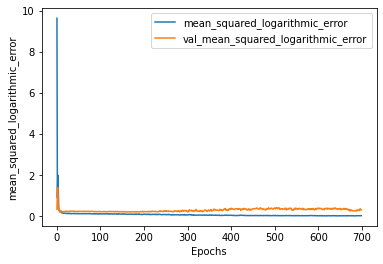

In [9]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [10]:
x_test['prediction'] = model.predict(x_test_scaled)

In [11]:
x_test

,0,1,2,3,4,5,6,7,8,9,prediction
0,0.030811,0.050680,0.056307,0.076958,0.049341,-0.012274,-0.036038,0.071210,0.120053,0.090049,249.623840
1,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,255.538254
2,0.041708,0.050680,-0.038540,0.052858,0.076860,0.116430,-0.039719,0.071210,-0.022512,-0.013504,72.410286
3,0.056239,0.050680,0.009961,0.049415,-0.004321,-0.012274,-0.043401,0.034309,0.060788,0.032059,203.813065
4,-0.038207,-0.044642,-0.054707,-0.077971,-0.033216,-0.086490,0.140681,-0.076395,-0.019197,-0.005220,68.140961
...,...,...,...,...,...,...,...,...,...,...,...
84,0.016281,0.050680,-0.021295,-0.009113,0.034206,0.047850,0.000779,-0.002592,-0.012908,0.023775,99.457657
85,-0.001882,-0.044642,-0.066563,0.001215,-0.002945,0.003070,0.011824,-0.002592,-0.020289,-0.025930,122.383957
86,0.067136,0.050680,-0.006206,0.063187,-0.042848,-0.095885,0.052322,-0.076395,0.059424,0.052770,205.392487
87,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,148.786514


In [12]:
y_test = np.transpose(y_test)

In [13]:
y_test

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,310.0,151.0,253.0,150.0,60.0,202.0,262.0,65.0,195.0,275.0,...,209.0,104.0,163.0,163.0,99.0,107.0,79.0,283.0,120.0,172.0


C:\Users\A\anaconda3\envs\tf_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


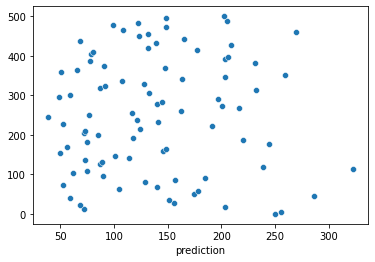

In [15]:
sns.scatterplot(x_test['prediction'],np.linspace(0,500,89))
# sns.scatterplot(y_test,np.linspace(0,500,89),color='r')
plt.show()
# _, accuracy = model.evaluate(x_test, y_test)
# print("Model accuracy: %.2f"% (accuracy*100))

In [ ]:
y_test.shape

In [ ]:
np.reshape(y_test,(89,))
